In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np

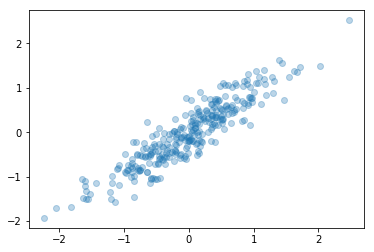

In [2]:
X1=np.random.randn(300,2)
A=np.array([[0.6,.4],[.4,0.6]])
X2=np.dot(X1,A)
plt.plot(X2[:,0],X2[:,1],'o',alpha=0.3)

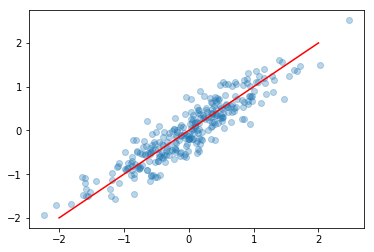

In [3]:
model=[0+1*x for x in np.arange(-2,3)]
plt.plot(X2[:,0],X2[:,1],'o',alpha=0.3);
plt.plot(np.arange(-2,3),model,'r');
plt.show()

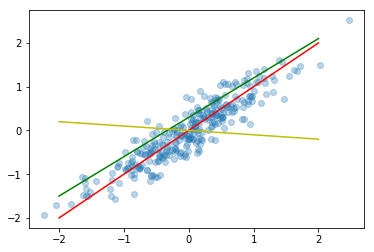

In [4]:
plt.plot(X2[:,0],X2[:,1],'o',alpha=0.3);
model1=[0+1*x for x in np.arange(-2,3)]
model2=[0.3+0.9*x for x in np.arange(-2,3)]
model3=[0-0.1*x for x in np.arange(-2,3)]
plt.plot(np.arange(-2,3),model1,'r')
plt.plot(np.arange(-2,3),model2,'g')
plt.plot(np.arange(-2,3),model3,'y')
plt.savefig('./ExSimpleRegModels.png',dpi=300,bbox_inches='tight')

In [5]:
ice=pd.read_csv('IDSgithub/files/ch06/SeaIce.txt',delim_whitespace=True)
print('Shape: ',ice.shape)
ice.head()

Shape:  (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


In [6]:
ice.mean()

year                                         (1996+0j)
mo                                            (6.5+0j)
data_type    (1.10281411177e-312+1.102814053276e-312j)
region                                              0j
extent                         (-35.44306603773586+0j)
area                           (-37.92110849056599+0j)
dtype: complex128

Text(0,0.5,'Extent')

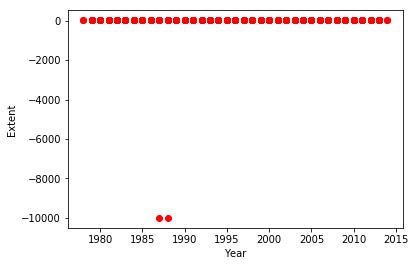

In [7]:
x=ice.year
y=ice.extent
plt.scatter(x,y,color='red')
plt.xlabel('Year')
plt.ylabel('Extent')

In [8]:
print('Different values in data_type field: ',np.unique(ice.data_type.values))

Different values in data_type field:  ['-9999' 'Goddard' 'NRTSI-G']


In [9]:
print(ice[(ice.data_type!='Goddard')&(ice.data_type!='NRTSI-G')])

     year  mo data_type region  extent    area
9    1988   1     -9999      N -9999.0 -9999.0
397  1987  12     -9999      N -9999.0 -9999.0


Shape:  (422, 6)


Text(0,0.5,'Extent')

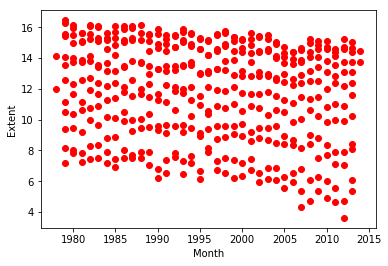

In [10]:
ice2=ice[ice.data_type!='-9999']
print('Shape: ',ice2.shape)
x=ice2.year
y=ice2.extent
plt.scatter(x,y,color='red')
plt.xlabel('Month')
plt.ylabel('Extent')

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


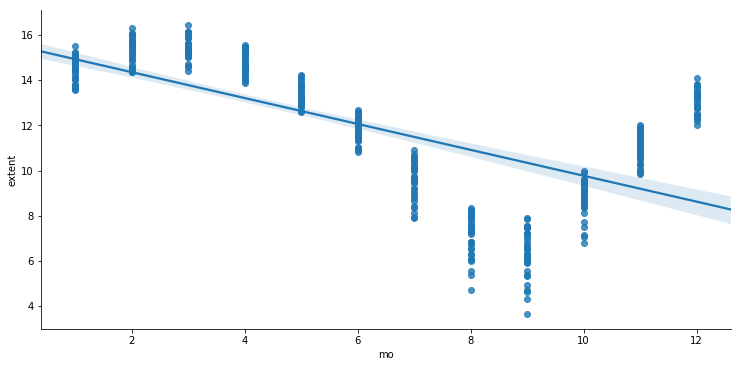

In [11]:
sns.lmplot('mo','extent',ice2,height=5.2,aspect=2);
plt.savefig('IDSgithub/files/ch06/IceExtentCleanedByMonth.png',dpi=300,bbox_inches='tight')

In [12]:
grouped=ice2.groupby('mo')
month_means=grouped.extent.mean()
month_variances=grouped.extent.var()
print('Means: ',month_means)
print('Variances: ',month_variances)

Means:  mo
1     14.479429
2     15.298889
3     15.491714
4     14.766000
5     13.396000
6     11.860000
7      9.601143
8      7.122286
9      6.404857
10     8.809143
11    10.964722
12    13.059429
Name: extent, dtype: float64
Variances:  mo
1     0.304906
2     0.295804
3     0.237209
4     0.215378
5     0.189901
6     0.247918
7     0.679175
8     0.824577
9     1.143902
10    0.630361
11    0.412511
12    0.284870
Name: extent, dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/scipy

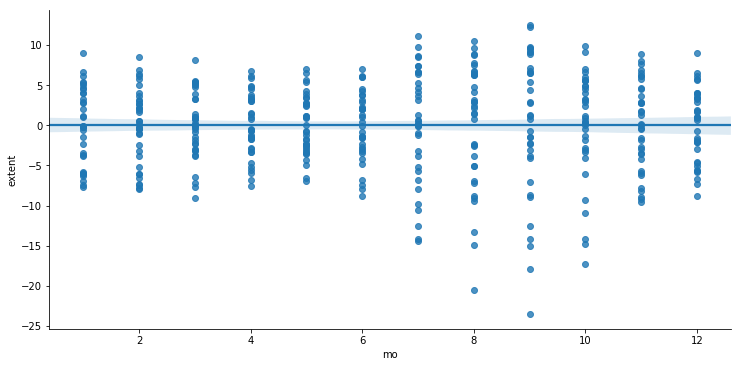

In [13]:
for i in range(12):
    ice2.extent[ice2.mo==i+1]=100*(ice2.extent[ice2.mo==i+1]-month_means[i+1])/month_means.mean()
sns.lmplot('mo','extent',ice2,height=5.2,aspect=2);
plt.savefig('./IceExtentNormalizedByMonth.png',dpi=300,bbox_inches='tight')

In [14]:
print('Mean: ',ice2.extent.mean())
print('Variance: ',ice2.extent.var())

Mean:  -6.503486532875325e-15
Variance:  31.983239774968794


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


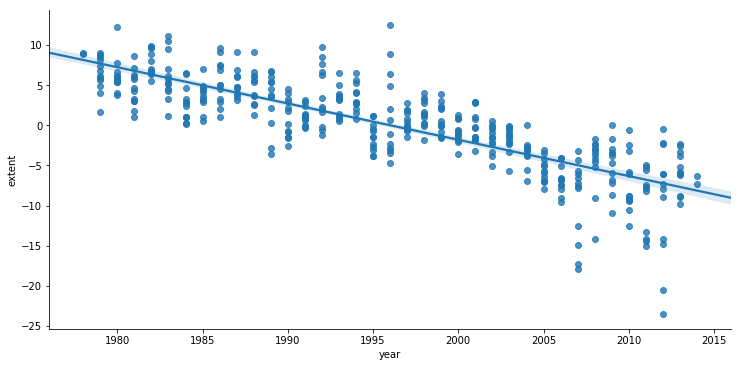

In [15]:
sns.lmplot('year','extent',ice2,height=5.2,aspect=2)
plt.savefig('./IceExtentAllMonthsByYearlmplot.png',dpi=300,bbox_inches='tight')

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


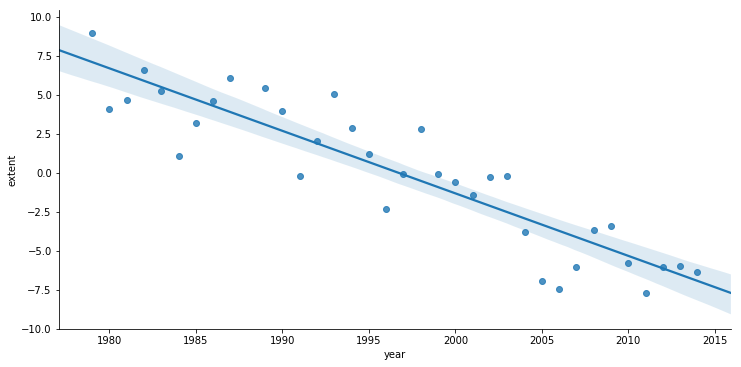

In [16]:
jan=ice2[ice2.mo==1];
sns.lmplot('year','extent',jan,height=5.2,aspect=2);

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


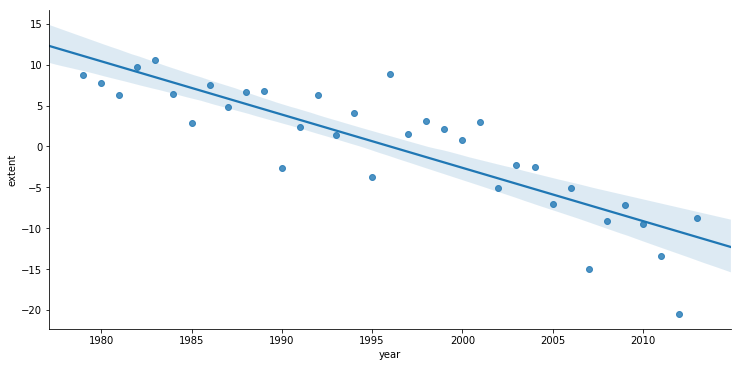

In [17]:
aug=ice2[ice2.mo==8]
sns.lmplot('year','extent',aug,height=5.2,aspect=2);

In [18]:
import scipy.stats
scipy.stats.pearsonr(ice2.year.values,ice2.extent.values)

(-0.8183500709897177, 4.4492318168694647e-103)

In [19]:
est=LinearRegression(fit_intercept=True)
x=ice2[['year']]
y=ice2[['extent']]
est.fit(x,y)
print('Coefficients: ',est.coef_)
print('Intercepts: ',est.intercept_)

Coefficients:  [[-0.45275459]]
Intercepts:  [903.71640207]


MSE:  10.539131639803518
R^2:  0.5067870382100239
Var:  extent    31.98324
dtype: float64


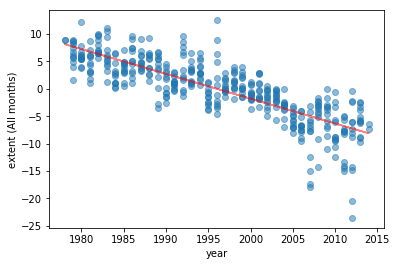

In [20]:
x=ice2[['year']]
y=ice2[['extent']]
model=LinearRegression()
model.fit(x,y)
y_hat=model.predict(x)
plt.plot(x,y,'o',alpha=0.5)
plt.plot(x,y_hat,'r',alpha=0.5)
plt.xlabel('year')
plt.ylabel('extent (All months)')
print('MSE: ',metrics.mean_squared_error(y_hat,y))
print('R^2: ',metrics.r2_score(y_hat,y))
print('Var: ',y.var())
plt.savefig('./IceExtentLinearRegressionAllMonthsByYearPrediction.png',dpi=300,bbox_inches='tight')

MSE: 3.839516075286746
R^2: 0.781063604139622


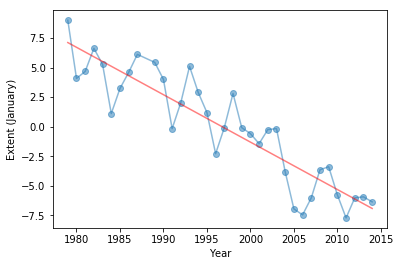

In [21]:
x=jan[['year']]
y=jan[['extent']]
model=LinearRegression()
model.fit(x,y)
y_hat=model.predict(x)
plt.figure()
plt.plot(x,y,'-o',alpha=0.5)
plt.plot(x,y_hat,'r',alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Extent (January)')
print('MSE:',metrics.mean_squared_error(y_hat,y))
print('R^2:',metrics.r2_score(y_hat,y))

In [22]:
X=[[2025]]
y_hat=model.predict(X)
j=1
y_hat=(y_hat*month_means.mean()/100)+month_means[j]
print('Prediction of extent for January 2025 (in millions of square km): ',y_hat)

Prediction of extent for January 2025 (in millions of square km):  [[13.14449923]]
